Project to predict the exam scores of students

Project LifeCycle:
- Understanding the problem statement /n
- Data Collection
- Data validation and Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Model Evaluation
- Result - Select Best Model

1) Problem Statement:
- The project is about estimating student's exam scores based on variables like gender, race/ethnicity,parental level of education, lunch,test preparation course.


2) Data Collection
- Data Source: https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics?select=exams.csv
- There are 8 columns and 1000 rows in the dataset.

2.1 Import Dataset and required packages

2.1.1 Importing numpy, pandas, matplotlib, seaborn and warnings library

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

2.1.2 Importing the dataset into datafreme using pandas

In [2]:
df = pd.read_csv("data/exams.csv")

2.2 Dataset Information
- Gender: The gender of the student (male/female)
- Race/ethnicity: The student's racial or ethnic background.
- Parental level of education: The highest level of education attained by the parents
- Lunch: Whether the student receives free or reduced-price lunch (yes/no)
- Test preparation course: Whether the student completed a test preparation course
- Math score: The student's score on a standardized mathematics test
- Reading score: The student's score on a standardized reading test
- Writing score: The student's score on a standardized writing test

3. Data Validation
- Check Missing Values
- Check Duplicates
- Check Data Types
- Check the number of unique values of each column
- Check statistics of Dataset
- Check various categories present in different categorical columns

3.1 Check missing values

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Observation: There is no column with missing or N/A value.

3.2 Check Duplicates

In [11]:
df.duplicated().sum()

0

Observation: There are no duplicate rows in the data set.

3.3 Check the data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Check the number of unique values in each column

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

3.5 Check Statistics of dataset

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


Observations:
- All means are very close to each other, between 67 to 70
- All standard deviation are also close to each other, between 14 to 16
- Reading score is much higher than math and writing score

3.6 Check various categories present in different categorical columns

In [18]:
print("Categories in 'Gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'Race/Ethnicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'Parental Level of Education' variable: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'Lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'Test Preparation Course' variable: ", end=" ")
print(df['test preparation course'].unique())

Categories in 'Gender' variable:  ['female' 'male']
Categories in 'Race/Ethnicity' variable:  ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in 'Parental Level of Education' variable:  ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'Lunch' variable:  ['standard' 'free/reduced']
Categories in 'Test Preparation Course' variable:  ['completed' 'none']


3.7 Number of categorical and Numerical Features

In [21]:
numeric_features = [variable for variable in df.columns if df[variable].dtype != 'O']
categorical_features = [variable for variable in df.columns if df[variable].dtype == 'O']

print('We have {} numercial features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numercial features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 Add columns 'Total Score' and 'Average Score' (Feature Engineering)

In [23]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


3.9 Finding total number of student with fullmarks for each subject separately

In [33]:
reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

print('Number of students with full marks in Reading: ', reading_full)
print('Number of students with full marks in Writing: ', writing_full)
print('Number of students with full marks in Math: ', math_full)

Number of students with full marks in Reading:  10
Number of students with full marks in Writing:  13
Number of students with full marks in Math:  9


3.10 Finding total number of student with less than 20 marks for each subject separately

In [35]:
reading_less_20 = df[df['reading score'] < 20]['average score'].count()
writing_less_20 = df[df['writing score'] < 20]['average score'].count()
math_less_20 = df[df['math score'] < 20]['average score'].count()

print('Number of students with full marks in Reading: ', reading_less_20)
print('Number of students with full marks in Writing: ', writing_less_20)
print('Number of students with full marks in Math: ', math_less_20)

Number of students with full marks in Reading:  0
Number of students with full marks in Writing:  2
Number of students with full marks in Math:  1


4. Data Visualization

4.1 Visualize average score distribution to make some conclusion
- Histogram
- Kernel Distribution Function (KDE)

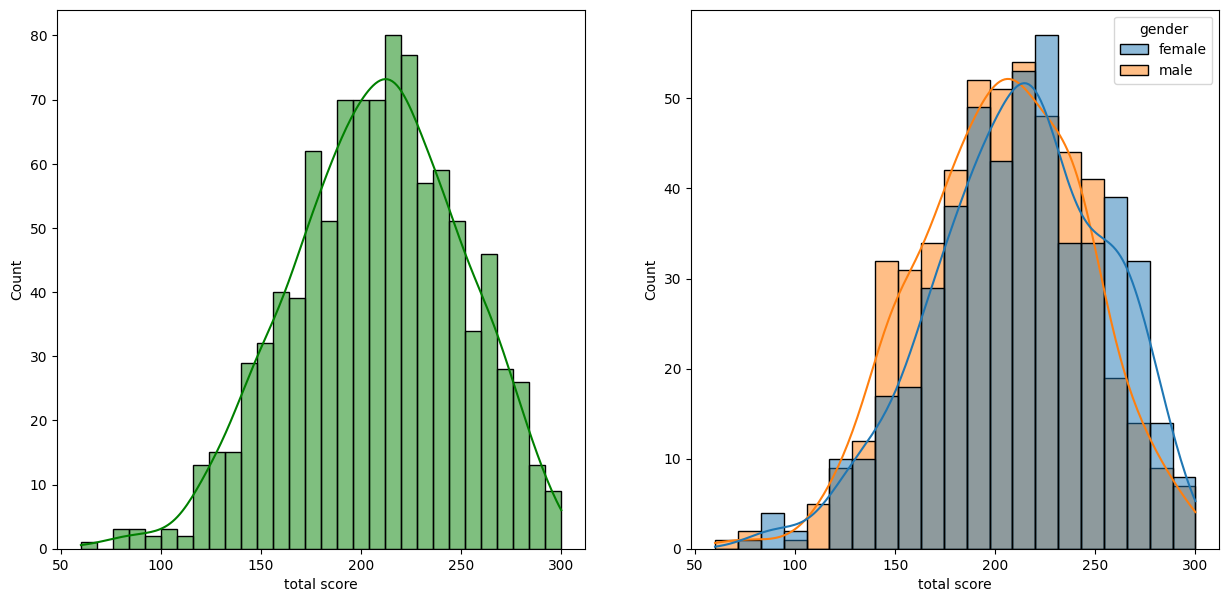

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

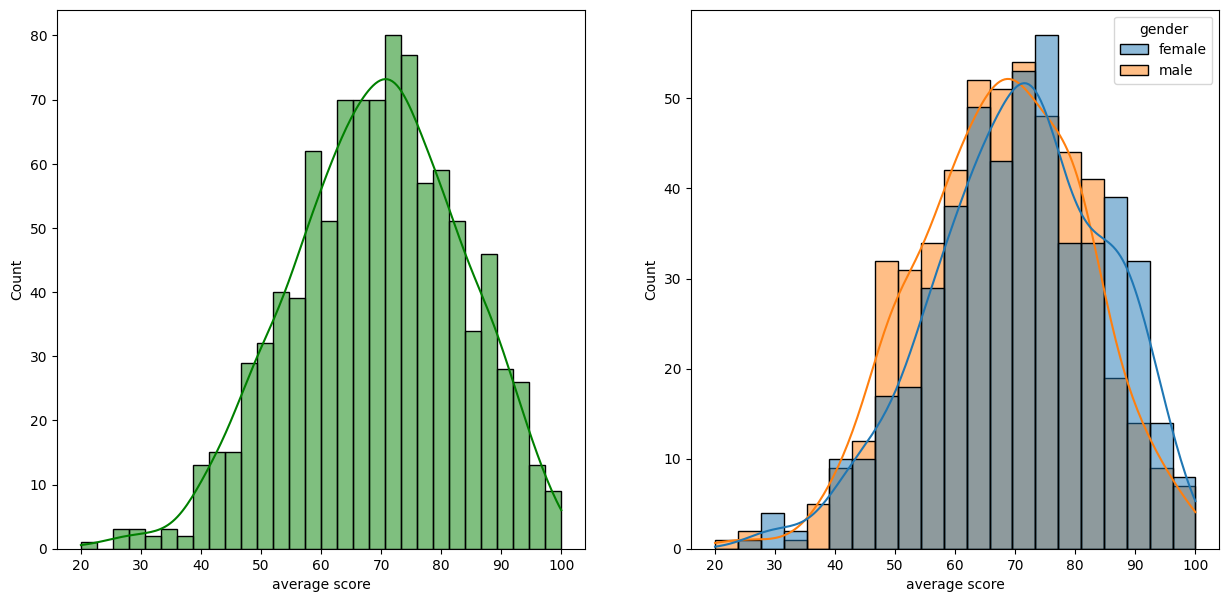

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average score', kde=True, hue='gender')
plt.show()

Observation:
Female students tend to perform better than male students.

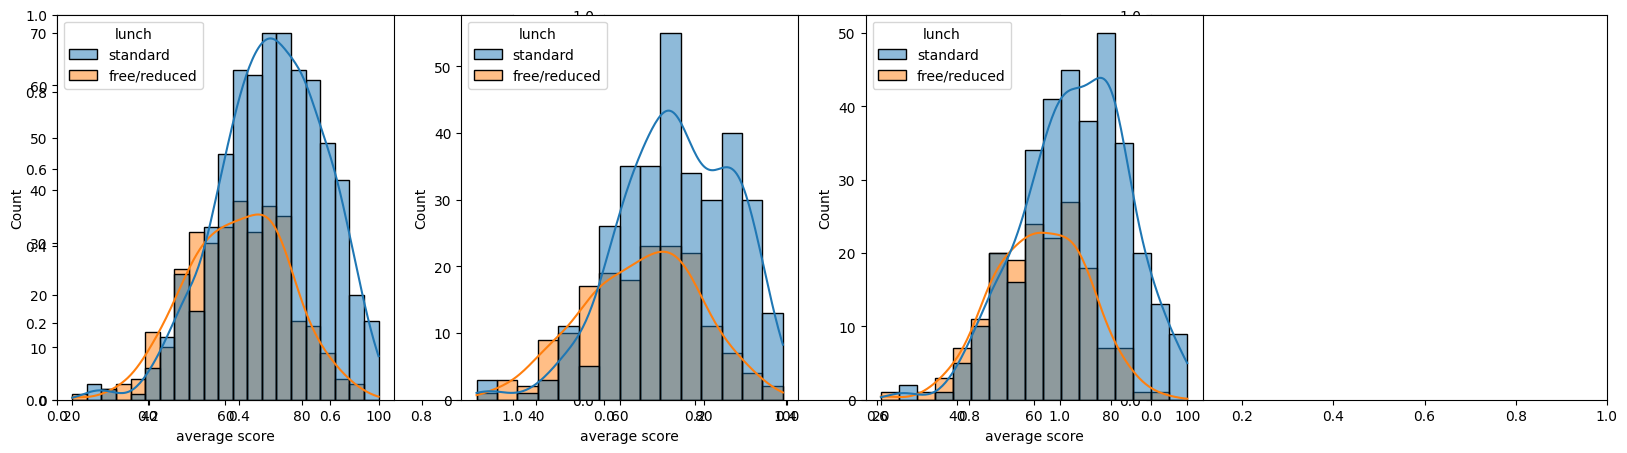

In [48]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(141)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.show()

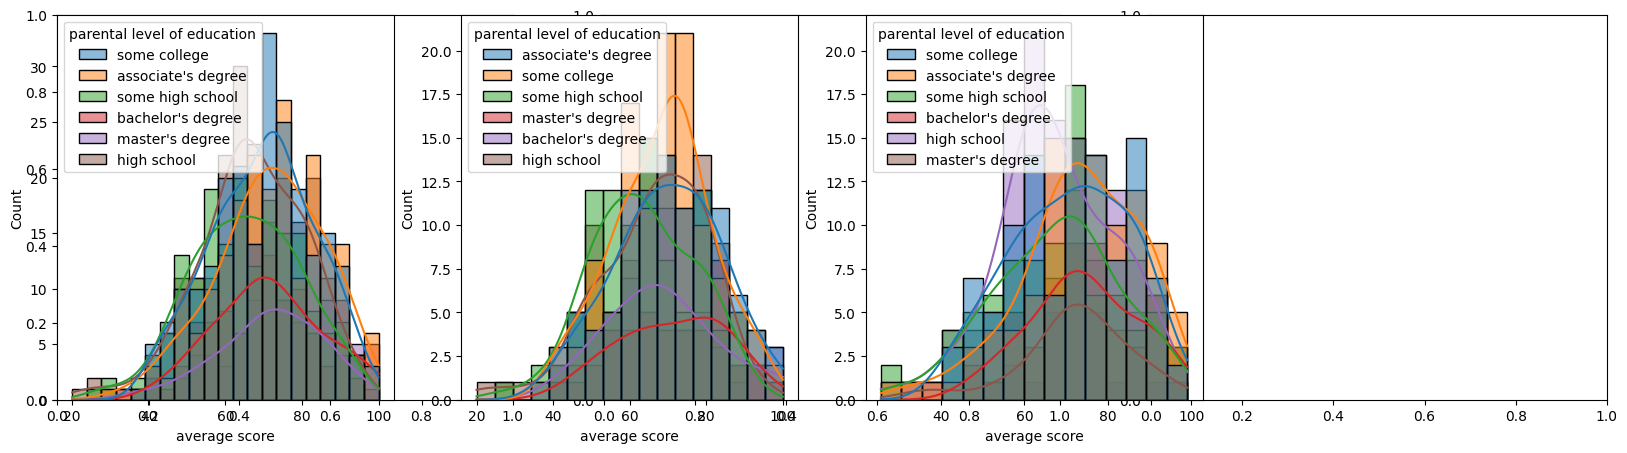

In [51]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(141)
ax =sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.show()

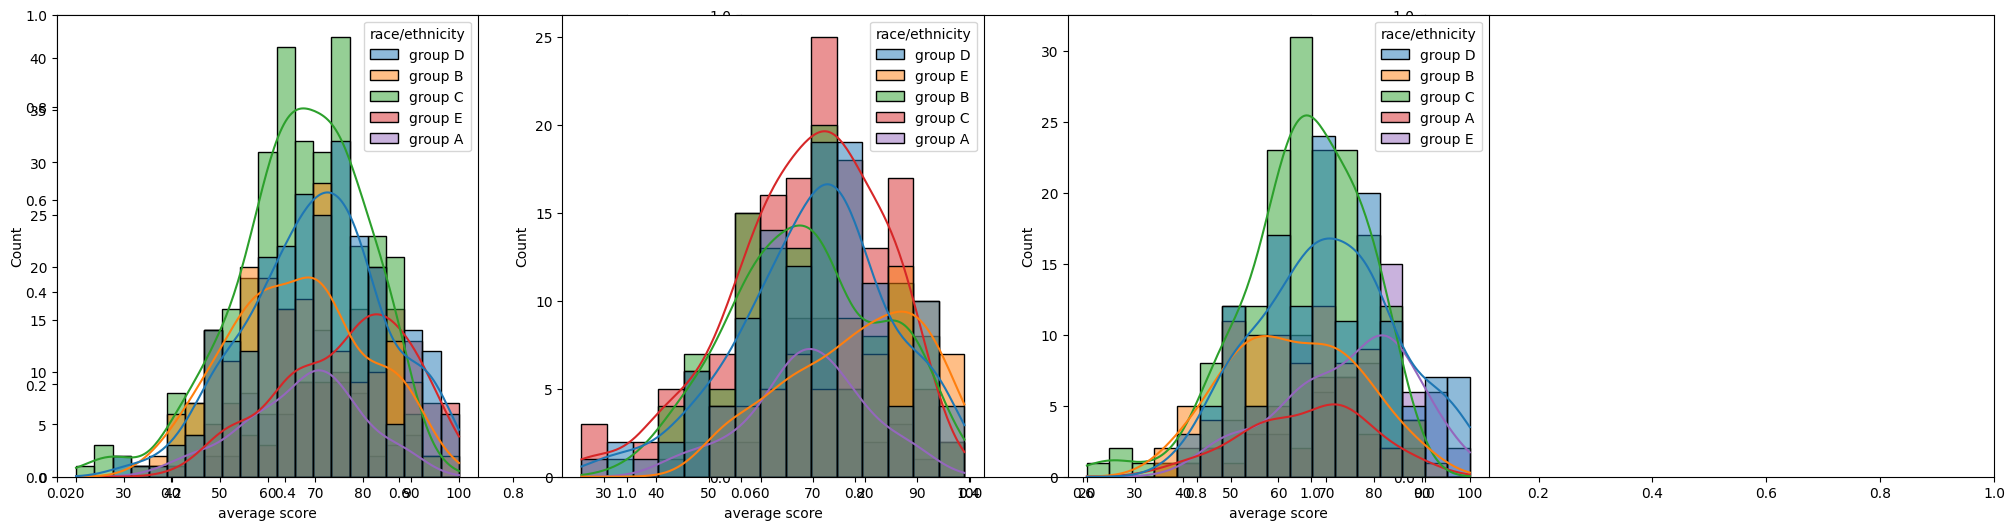

In [53]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')
plt.show()